In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
#Data can be downloaded from repository
df = pd.read_excel("/Users/guneykan/Desktop/PS1Data.xlsx", index_col=0)

In [35]:
df.head()

,dc,Rm-r,r,Rm,m
year,,,,,
1948,1.000153,-0.057022,1.005815,-0.051207,0.999847
1949,1.005761,0.073325,1.008634,0.081959,0.994272
1950,1.005616,0.262168,1.011056,0.273224,0.994415
1951,1.032057,0.339622,1.012673,0.352295,0.968939
1952,1.004157,0.100778,1.015306,0.116084,0.995860


In [29]:
# Calculate market return from risk premium, risk free is given as "1+risk-free" that is whhy we substract 1
df["Rm"] = df["Rm-r"] + df["r"] - 1
# Mean Risk Premium
hist_Rp = np.mean(df["Rm-r"])
# Mean Risk-Free
hist_Rf = np.mean(df["r"])
# Gamma represent risk avereness of the investors
gamma = np.arange(2, 101)
# Given the utility function, and definition of the stochastic discount factor, check the report for the details
df["m"] = 1/df["dc"]

In [130]:
# Holders
inverse_dc = np.array(df["m"])
m_gamma = np.arange(6237, dtype=np.float64).reshape(63, 99)
cov_Rm_m = np.arange(99, dtype=np.float64)
c_capm_Rp = np.arange(99, dtype=np.float64)
c_capm_Rf = np.arange(99, dtype=np.float64)
hist_rp_array = np.full((99,), hist_Rp)
hist_rf_array = np.full((99,), hist_Rf)

In [131]:
# Applying C-CAPM formula
for i in range(99):
    m_gamma[:, i]=np.power(a, gamma[i])
    cov_Rm_m[i]=np.cov(m_gamma[:, i], df["Rm"])[0][1]
    c_capm_Rp[i]= -1*cov_Rm_m[i]*hist_Rf
    c_capm_Rf[i]= 1/np.mean(m_gamma[:, i])

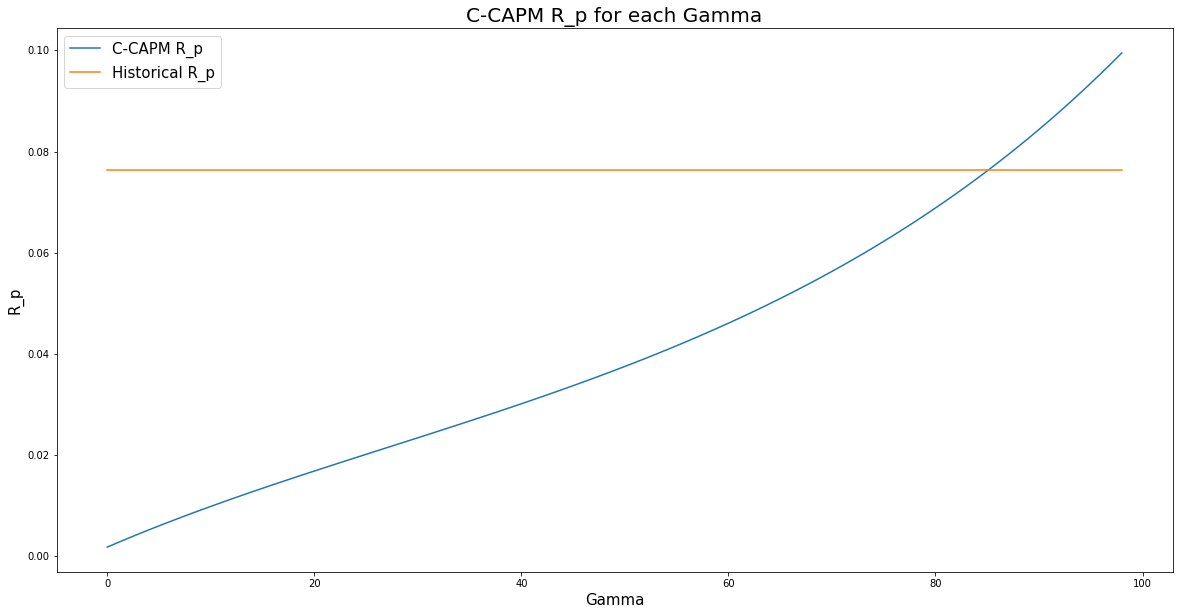

In [137]:
plt.figure(figsize=(20,10))
plt.title("C-CAPM R_p for each Gamma", size=20)
plt.xlabel('Gamma', size=15)
plt.ylabel('R_p', size=15)
plt.plot(c_capm_Rp, label = "C-CAPM R_p")
plt.plot(hist_rp_array, label = "Historical R_p")
plt.legend(prop={'size': 15})


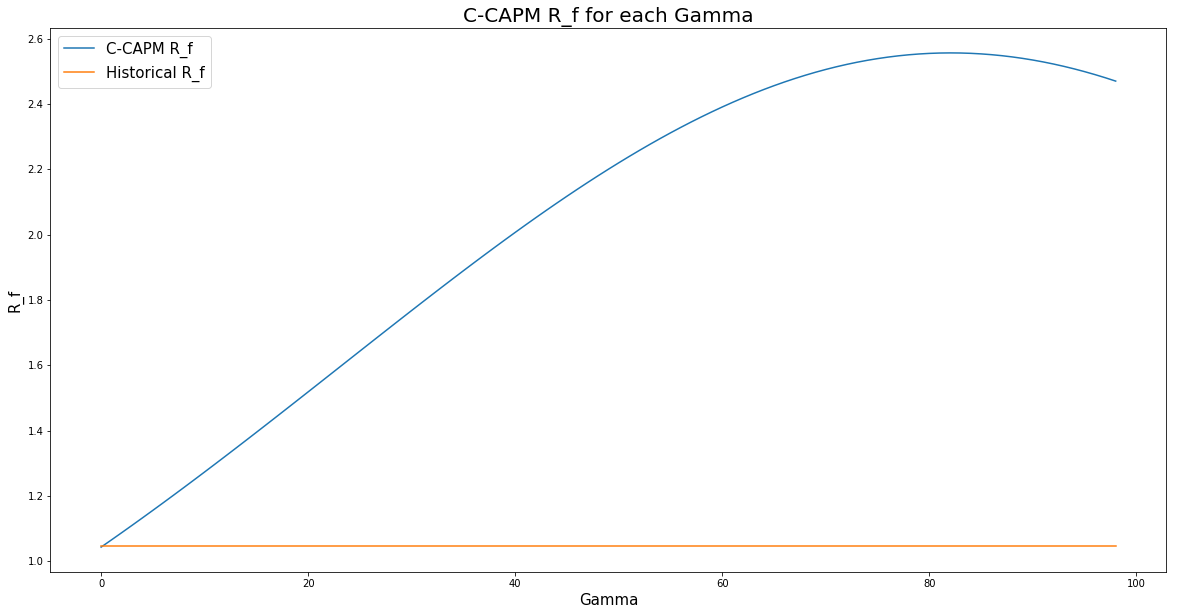

In [143]:
plt.figure(figsize=(20,10))
plt.title("C-CAPM R_f for each Gamma", size=20)
plt.xlabel('Gamma', size=15)
plt.ylabel('R_f', size=15)
plt.plot(c_capm_Rf, label = "C-CAPM R_f")
plt.plot(hist_rf_array, label = "Historical R_f")
plt.legend(prop={'size': 15})

In [161]:
correspond_rf = gamma[np.where(np.absolute(c_capm_Rf-hist_Rf) == np.amin(np.absolute(c_capm_Rf-hist_Rf)))[0]]
correspond_rp = gamma[np.where(np.absolute(c_capm_Rp-hist_Rp) == np.amin(np.absolute(c_capm_Rp-hist_Rp)))[0]]

In [163]:
print("gamma that corresponds to hist. Rp:", correspond_rp)
print("gamma that corresponds to hist. Rf:", correspond_rf)

gamma that corresponds to hist. Rp: [87]
gamma that corresponds to hist. Rf: [2]


In [166]:
m_gamma_abel = np.arange(62*99, dtype=np.float64).reshape(62, 99)
cov_Rm_m_abel = np.arange(99, dtype=np.float64)
c_capm_Rp_abel = np.arange(99, dtype=np.float64)
c_capm_Rf_abel = np.arange(99, dtype=np.float64)

In [167]:
# Applying C-CAPM with the Abel's utility function
for i in range(99):
    for t in range(62):
        m_gamma_abel[t, i]=np.power(a[t], 1-gamma[i])*np.power(a[t+1], gamma[i])
    cov_Rm_m_abel[i]=np.cov(m_gamma_abel[:, i], df["Rm"][1:])[0][1]
    c_capm_Rp_abel[i]= -1*cov_Rm_m_abel[i]*hist_Rf
    c_capm_Rf_abel[i]= 1/np.mean(m_gamma_abel[:, i])

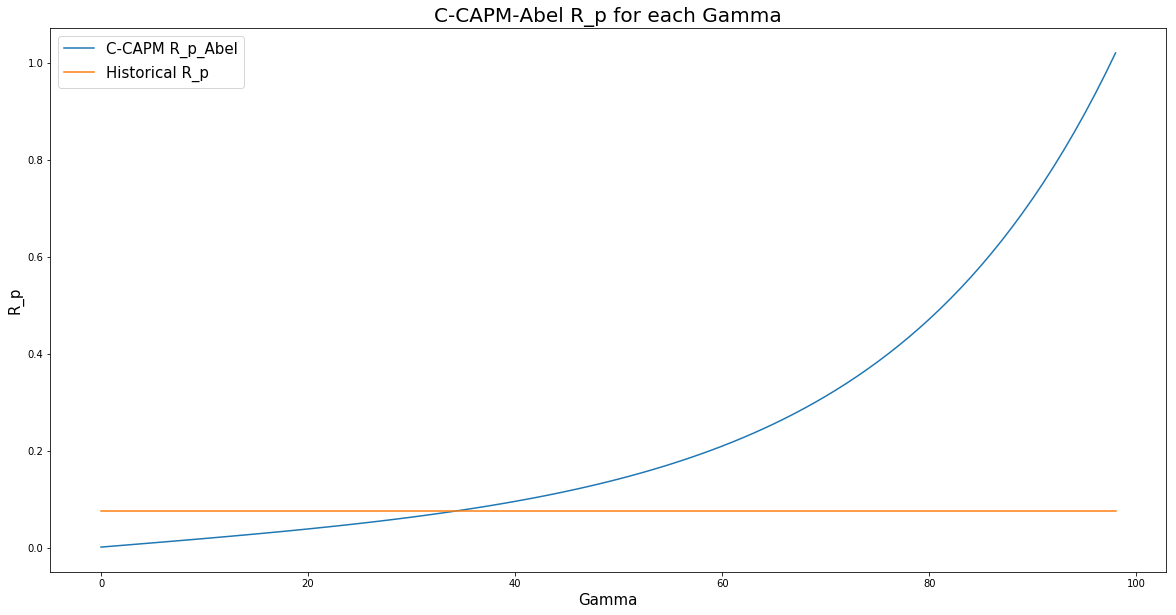

In [170]:
plt.figure(figsize=(20,10))
plt.title("C-CAPM-Abel R_p for each Gamma", size=20)
plt.xlabel('Gamma', size=15)
plt.ylabel('R_p', size=15)
plt.plot(c_capm_Rp_abel, label = "C-CAPM R_p_Abel")
plt.plot(hist_rp_array, label = "Historical R_p")
plt.legend(prop={'size': 15})


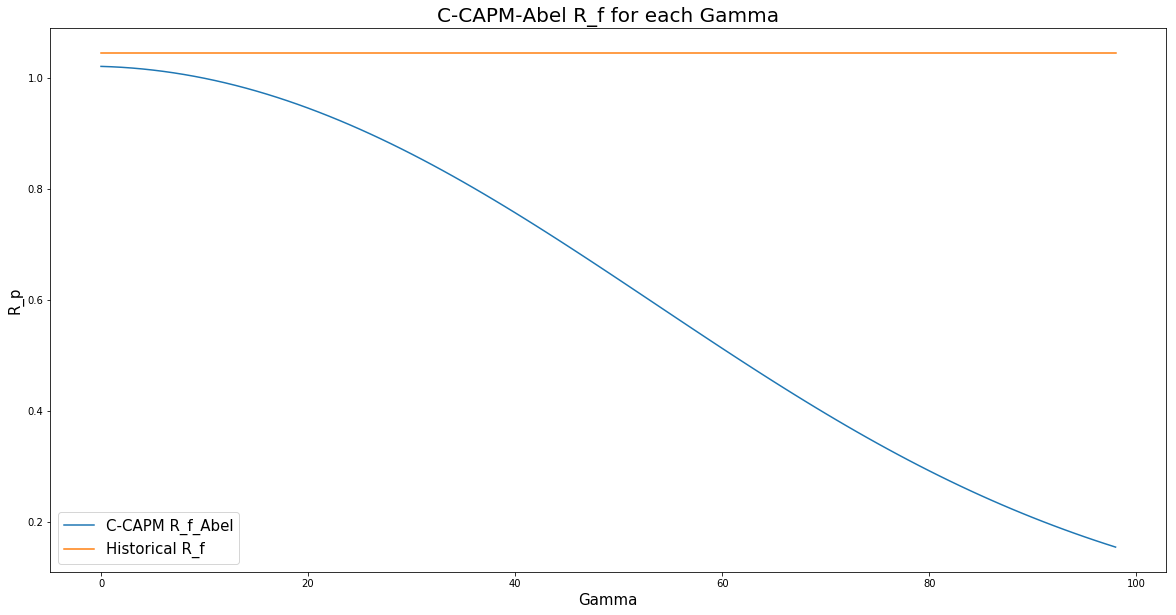

In [171]:
plt.figure(figsize=(20,10))
plt.title("C-CAPM-Abel R_f for each Gamma", size=20)
plt.xlabel('Gamma', size=15)
plt.ylabel('R_p', size=15)
plt.plot(c_capm_Rf_abel, label = "C-CAPM R_f_Abel")
plt.plot(hist_rf_array, label = "Historical R_f")
plt.legend(prop={'size': 15})


In [176]:
correspond_rf = gamma[np.where(np.absolute(c_capm_Rf_abel-hist_Rf) == np.amin(np.absolute(c_capm_Rf_abel-hist_Rf)))[0]]
correspond_rp = gamma[np.where(np.absolute(c_capm_Rp_abel-hist_Rp) == np.amin(np.absolute(c_capm_Rp_abel-hist_Rp)))[0]]